In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [15]:
dataset = pd.read_csv("loan.csv")
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

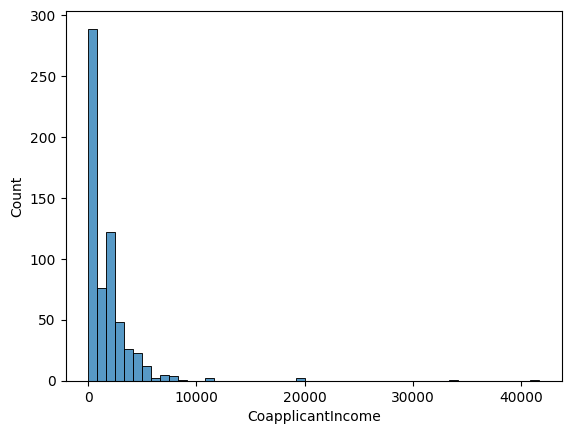

In [17]:
sns.histplot(dataset["CoapplicantIncome"])
plt.show()

In [18]:
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q3 = dataset["CoapplicantIncome"].quantile(0.75)
iqr = q3 - q1

In [19]:
min_r = q1 - (1.5 * iqr)
max_r = q3 + (1.5 * iqr)
min_r, max_r

(np.float64(-3445.875), np.float64(5743.125))

In [20]:
# dataset= dataset[dataset["CoapplicantIncome"] <= max_r]

In [21]:
from sklearn.preprocessing import FunctionTransformer

In [22]:
ft = FunctionTransformer(func = np.log1p)

In [23]:
ft.fit(dataset[["CoapplicantIncome"]])

,func,<ufunc 'log1p'>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None
,inv_kw_args,None


In [24]:
ft.transform(dataset[["CoapplicantIncome"]])

,CoapplicantIncome
0,0.000000
1,7.319202
2,0.000000
3,7.765993
4,0.000000
...,...
609,0.000000
610,0.000000
611,5.484797
612,0.000000


In [25]:
dataset["CoapplicantIncome_tf"] =  ft.transform(dataset[["CoapplicantIncome"]])

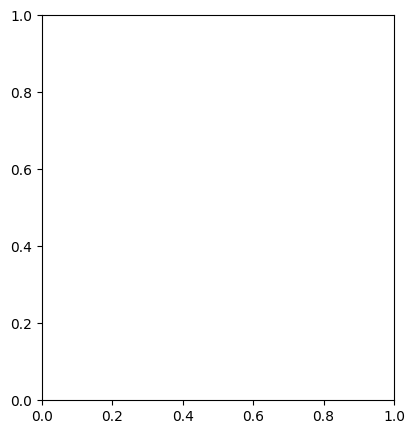

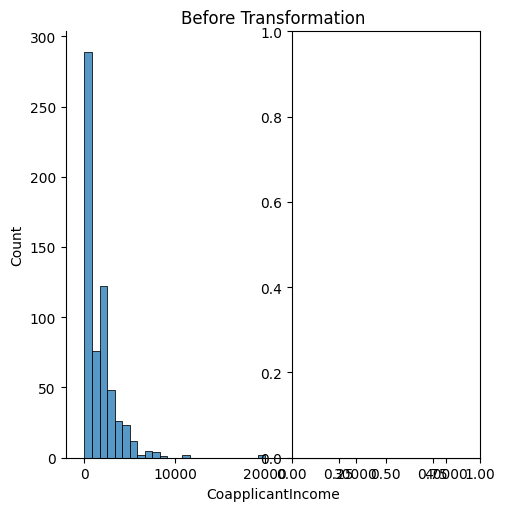

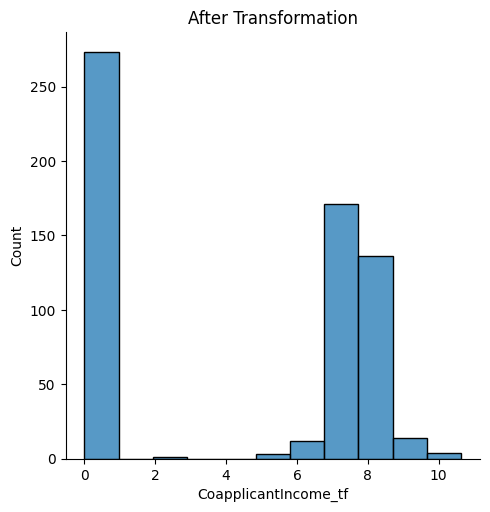

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(121) # Use the single-argument shorthand
sns.displot(dataset["CoapplicantIncome"])
plt.title("Before Transformation")

plt.subplot(122) # Use the single-argument shorthand
sns.displot(dataset["CoapplicantIncome_tf"])
plt.title("After Transformation")
plt.show()

In [ ]:
# ft1 = FunctionTransformer(func = lambda x : x**2)
# ft1.fit(dataset[["CoapplicantIncome"]])
# dataset["CoapplicantIncome_tf1"] =  ft1.transform(dataset[["CoapplicantIncome"]])

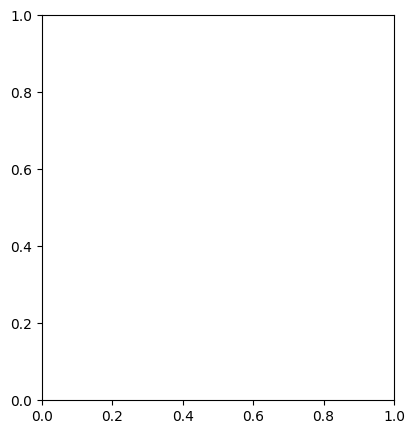

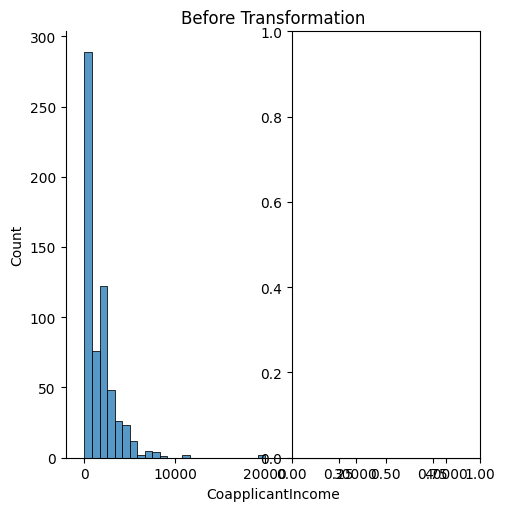

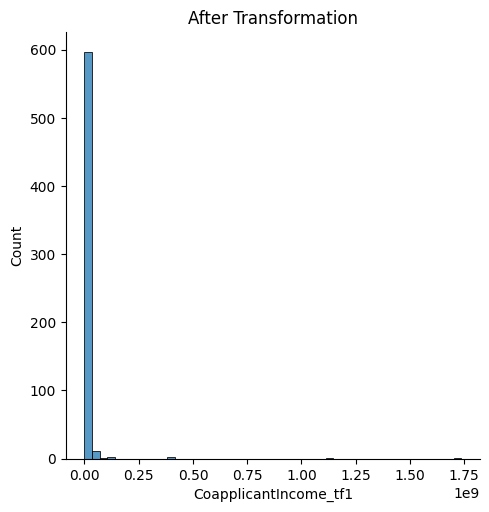

In [ ]:
# plt.figure(figsize=(10,5))
# plt.subplot(121) # Use the single-argument shorthand
# sns.displot(dataset["CoapplicantIncome"])
# plt.title("Before Transformation")

# plt.subplot(122) # Use the single-argument shorthand
# sns.displot(dataset["CoapplicantIncome_tf1"])
# plt.title("After Transformation")
# plt.show()